In [2]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os

# clean debit card statement

In [18]:
# read the csv file. The first column should not be treated as the index column
df = pd.read_csv("chase_checking.csv", index_col=False)
df

,Details,Posting Date,Description,Amount,Type,Balance,Check or Slip #
0,DEBIT,12/27/23,verizon,-140.26,ACH_DEBIT,4042.87,NaN
1,DEBIT,12/27/23,bank loan,-3020.98,ACH_DEBIT,4183.13,NaN
2,CREDIT,12/26/23,paycheck,480.00,ACH_CREDIT,7204.11,NaN
3,CREDIT,12/22/23,paycheck,2311.12,ACH_CREDIT,6724.11,NaN
4,DEBIT,12/19/23,mutual fund,-50.00,ACH_DEBIT,4412.99,NaN
5,DEBIT,12/19/23,daycare,-500.00,ACH_DEBIT,4462.99,NaN
6,CREDIT,12/19/23,paycheck,55.95,ACH_CREDIT,4962.99,NaN
7,CREDIT,12/19/23,VENMO CASHOUT PP...,67.47,ACH_CREDIT,4907.04,NaN


In [19]:
# remove the columns: Details, Balance and Check or Slip #
df = df.drop(columns=['Details','Balance', 'Check or Slip #'])

# rename the 'Posting Date' column to 'Date'
df = df.rename(columns={'Posting Date': 'Date'})

# rename Type column to Account
df = df.rename(columns={'Type': 'Account'})

# Change the data type of the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create new columns filled with NaN values
df['Category'] = np.nan
df['Memo'] = np.nan

# Reorder the columns
column_order = ['Date', 'Description', 'Category', 'Amount', 'Account', 'Memo']
df = df[column_order]

# change all account values to be 'checking account'
df['Account'] = 'checking account'

# Filter and remove rows containing 'venmo'.
# This is because I record venmo transactions separately as I can't see any details of cashout
df = df[~df['Description'].str.lower().str.contains('venmo')]

# Reset the index after filtering
df.reset_index(drop=True, inplace=True)

# update 'Category' based on matching keywords in 'Description'
df.loc[df['Description'].str.contains('bank loan', case=False), 'Category'] = 'Mortgage'
df.loc[df['Description'].str.contains('verizon', case=False), 'Category'] = 'Phone & Internet'
df.loc[df['Description'].str.contains('paycheck', case=False), 'Category'] = 'Income'
df.loc[df['Description'].str.contains('mutual fund', case=False), 'Category'] = 'Investment'
df.loc[df['Description'].str.contains('city of abc', case=False), 'Category'] = 'Utilities'
df.loc[df['Description'].str.contains('life insurance', case=False), 'Category'] = 'Insurance'
df.loc[df['Description'].str.contains('daycare', case=False), 'Category'] = 'Childcare'

In [20]:
df = df.sort_values(by='Date', ascending=True)
# Reset the index to maintain a continuous index
df.reset_index(drop=True, inplace=True)
df

,Date,Description,Category,Amount,Account,Memo
0,2023-12-19,mutual fund,Investment,-50.00,checking account,NaN
1,2023-12-19,daycare,Childcare,-500.00,checking account,NaN
2,2023-12-19,paycheck,Income,55.95,checking account,NaN
3,2023-12-22,paycheck,Income,2311.12,checking account,NaN
4,2023-12-26,paycheck,Income,480.00,checking account,NaN
5,2023-12-27,verizon,Phone & Internet,-140.26,checking account,NaN
6,2023-12-27,bank loan,Mortgage,-3020.98,checking account,NaN


# clean credit card statement

In [21]:
# read the csv file
# you will see some Descriptions have been categorized incorrectly. These will go away after cleaning
df2 = pd.read_csv("chase_credit.csv", index_col=False)
df2

,Transaction Date,Post Date,Description,Category,Type,Amount,Memo
0,12/28/23,12/29/23,EXXON,Gas,Sale,-28.61,NaN
1,12/28/23,12/29/23,tiki bar,Food & Drink,Sale,-41.81,NaN
2,12/27/23,12/27/23,spotify,Health (wrong category),Sale,-13.25,NaN
3,12/27/23,12/27/23,safeway,Groceries,Sale,-86.01,NaN
4,12/26/23,12/27/23,donation,Gifts & Donations,Sale,-25.00,NaN
5,12/26/23,12/26/23,escape room,Entertainment,Sale,-150.00,NaN
6,12/24/23,12/25/23,fiber,Shopping (wrong category),Sale,-67.83,NaN
7,12/25/23,12/25/23,farmers market,Shopping (wrong category),Sale,-25.00,NaN


In [22]:
df2 = df2.drop(columns=['Post Date'])
df2

,Transaction Date,Description,Category,Type,Amount,Memo
0,12/28/23,EXXON,Gas,Sale,-28.61,NaN
1,12/28/23,tiki bar,Food & Drink,Sale,-41.81,NaN
2,12/27/23,spotify,Health (wrong category),Sale,-13.25,NaN
3,12/27/23,safeway,Groceries,Sale,-86.01,NaN
4,12/26/23,donation,Gifts & Donations,Sale,-25.00,NaN
5,12/26/23,escape room,Entertainment,Sale,-150.00,NaN
6,12/24/23,fiber,Shopping (wrong category),Sale,-67.83,NaN
7,12/25/23,farmers market,Shopping (wrong category),Sale,-25.00,NaN


In [23]:
# change Transaction Date to Date
df2 = df2.rename(columns={'Transaction Date': 'Date'})

# rename Type column to Account
df2 = df2.rename(columns={'Type': 'Account'})

# change the data type of the 'Date' column to datetime
df2['Date'] = pd.to_datetime(df2['Date'])

# Reorder the columns to match the checking account
df2 = df2[['Date', 'Description', 'Category', 'Amount', 'Account', 'Memo']]

# change all account values to be credit card
df2['Account'] = 'credit card'

# Filter and remove rows containing 'AUTOMATIC' in 'Description'
df2 = df2[~df2['Description'].str.lower().str.contains('AUTOMATIC', case=False)]

# update 'Category' based on specific conditions in 'Description'
# customize the keyword and category based on your needs
df2.loc[df2['Description'].str.contains('spotify', case=False), 'Category'] = 'Subscription'
df2.loc[df2['Description'].str.contains('farmers market', case=False), 'Category'] = 'Groceries'
df2.loc[df2['Description'].str.contains('fiber', case=False), 'Category'] = 'Phone & Internet'

In [24]:
# check the work
df2

,Date,Description,Category,Amount,Account,Memo
0,2023-12-28,EXXON,Gas,-28.61,credit card,NaN
1,2023-12-28,tiki bar,Food & Drink,-41.81,credit card,NaN
2,2023-12-27,spotify,Subscription,-13.25,credit card,NaN
3,2023-12-27,safeway,Groceries,-86.01,credit card,NaN
4,2023-12-26,donation,Gifts & Donations,-25.00,credit card,NaN
5,2023-12-26,escape room,Entertainment,-150.00,credit card,NaN
6,2023-12-24,fiber,Phone & Internet,-67.83,credit card,NaN
7,2023-12-25,farmers market,Groceries,-25.00,credit card,NaN


# combine the df's into 'master' df

In [25]:
# save the changed DataFrame as a new file
# just change df to df2 and vice versa, depending on which df you're adding.
df.to_csv('new_chase_checking.csv', index=False)

# read the new file. This should match the file name above and should be the same as the modified checking df
new_data = pd.read_csv('new_chase_checking.csv')
new_data

,Date,Description,Category,Amount,Account,Memo
0,2023-12-19,mutual fund,Investment,-50.00,checking account,NaN
1,2023-12-19,daycare,Childcare,-500.00,checking account,NaN
2,2023-12-19,paycheck,Income,55.95,checking account,NaN
3,2023-12-22,paycheck,Income,2311.12,checking account,NaN
4,2023-12-26,paycheck,Income,480.00,checking account,NaN
5,2023-12-27,verizon,Phone & Internet,-140.26,checking account,NaN
6,2023-12-27,bank loan,Mortgage,-3020.98,checking account,NaN


In [26]:
df2.to_csv('new_credit.csv', index=False)

new_credit = pd.read_csv('new_credit.csv')
new_credit

,Date,Description,Category,Amount,Account,Memo
0,2023-12-28,EXXON,Gas,-28.61,credit card,NaN
1,2023-12-28,tiki bar,Food & Drink,-41.81,credit card,NaN
2,2023-12-27,spotify,Subscription,-13.25,credit card,NaN
3,2023-12-27,safeway,Groceries,-86.01,credit card,NaN
4,2023-12-26,donation,Gifts & Donations,-25.00,credit card,NaN
5,2023-12-26,escape room,Entertainment,-150.00,credit card,NaN
6,2023-12-24,fiber,Phone & Internet,-67.83,credit card,NaN
7,2023-12-25,farmers market,Groceries,-25.00,credit card,NaN


In [27]:
# Assuming you have an existing 'dummy_master.csv' file
existing_data = pd.read_csv('dummy_master.csv')

# Append the new data to the existing data
new_master = pd.concat([existing_data, new_data, new_credit], ignore_index=True)

# Save the merged data to 'master.csv'
new_master.to_csv('new_master.csv', index=False)

# Convert the 'Date' column to datetime data type
new_master['Date'] = pd.to_datetime(new_master['Date'])

In [30]:
new_master

,Date,Description,Category,Amount,Account,Memo
0,12/19/23,mutual fund,Investment,-50.00,checking account,NaN
1,12/19/23,daycare,Childcare,-500.00,checking account,NaN
2,12/19/23,paycheck,Income,55.95,checking account,NaN
3,12/22/23,paycheck,Income,2311.12,checking account,NaN
4,12/26/23,paycheck,Income,480.00,checking account,NaN
5,12/27/23,verizon,Phone & Internet,-140.26,checking account,NaN
6,12/27/23,bank loan,Mortgage,-3020.98,checking account,NaN
7,12/28/23,EXXON,Gas,-28.61,credit card,NaN
8,12/28/23,tiki bar,Food & Drink,-41.81,credit card,NaN
9,12/27/23,spotify,Subscription,-13.25,credit card,NaN


# check added data and duplicates

In [31]:
# check if the new df has been added at the bottom
new_master.sort_values('Date')

,Date,Description,Category,Amount,Account,Memo
0,12/19/23,mutual fund,Investment,-50.00,checking account,NaN
1,12/19/23,daycare,Childcare,-500.00,checking account,NaN
2,12/19/23,paycheck,Income,55.95,checking account,NaN
3,12/22/23,paycheck,Income,2311.12,checking account,NaN
13,12/24/23,fiber,Phone & Internet,-67.83,credit card,NaN
14,12/25/23,farmers market,Groceries,-25.00,credit card,NaN
4,12/26/23,paycheck,Income,480.00,checking account,NaN
11,12/26/23,donation,Gifts & Donations,-25.00,credit card,NaN
12,12/26/23,escape room,Entertainment,-150.00,credit card,NaN
5,12/27/23,verizon,Phone & Internet,-140.26,checking account,NaN


In [32]:
# Check for duplicate rows. There is none in this example.
duplicates = new_master.duplicated()

# Display matching rows (duplicates)
matching_rows = new_master[duplicates]
matching_rows

,Date,Description,Category,Amount,Account,Memo


In [33]:
# Remove duplicate rows, keeping the first occurrence
dummy_master_no_duplicates = new_master.drop_duplicates()
dummy_master_no_duplicates

,Date,Description,Category,Amount,Account,Memo
0,12/19/23,mutual fund,Investment,-50.00,checking account,NaN
1,12/19/23,daycare,Childcare,-500.00,checking account,NaN
2,12/19/23,paycheck,Income,55.95,checking account,NaN
3,12/22/23,paycheck,Income,2311.12,checking account,NaN
4,12/26/23,paycheck,Income,480.00,checking account,NaN
5,12/27/23,verizon,Phone & Internet,-140.26,checking account,NaN
6,12/27/23,bank loan,Mortgage,-3020.98,checking account,NaN
7,12/28/23,EXXON,Gas,-28.61,credit card,NaN
8,12/28/23,tiki bar,Food & Drink,-41.81,credit card,NaN
9,12/27/23,spotify,Subscription,-13.25,credit card,NaN


# filters for searching specific transactions

In [36]:
# Convert the 'Date' column to datetime data type
new_master['Date'] = pd.to_datetime(new_master['Date'])

# Filter by month and account type
filter_month = new_master[(new_master['Date'].dt.month == 12) & (new_master['Date'].dt.year == 2023) & (new_master['Account'] == 'credit card')]
filter_month

,Date,Description,Category,Amount,Account,Memo
7,2023-12-28,EXXON,Gas,-28.61,credit card,NaN
8,2023-12-28,tiki bar,Food & Drink,-41.81,credit card,NaN
9,2023-12-27,spotify,Subscription,-13.25,credit card,NaN
10,2023-12-27,safeway,Groceries,-86.01,credit card,NaN
11,2023-12-26,donation,Gifts & Donations,-25.00,credit card,NaN
12,2023-12-26,escape room,Entertainment,-150.00,credit card,NaN
13,2023-12-24,fiber,Phone & Internet,-67.83,credit card,NaN
14,2023-12-25,farmers market,Groceries,-25.00,credit card,NaN


In [37]:
# Filter rows with 'verizon' (or whatever you're searching for) in the 'Description' column
filter_rows = new_master[new_master['Description'].str.contains('verizon', case=False)]
filter_rows

,Date,Description,Category,Amount,Account,Memo
5,2023-12-27,verizon,Phone & Internet,-140.26,checking account,NaN


# delete csv

In [105]:
# List of file names to be deleted
files_to_delete = ['dummy_credit.csv']

# Iterate through the list and delete each file
for file_name in files_to_delete:
    if os.path.exists(file_name):
        os.remove(file_name)
        print(f"{file_name} has been deleted.")
    else:
        print(f"{file_name} does not exist.")


credit_a.csv has been deleted.


# analysis

In [40]:
chase_analysis = pd.read_csv('new_master.csv')
chase_analysis['Date'] = pd.to_datetime(chase_analysis['Date'])
chase_analysis

,Date,Description,Category,Amount,Account,Memo
0,2023-12-19,mutual fund,Investment,-50.00,checking account,NaN
1,2023-12-19,daycare,Childcare,-500.00,checking account,NaN
2,2023-12-19,paycheck,Income,55.95,checking account,NaN
3,2023-12-22,paycheck,Income,2311.12,checking account,NaN
4,2023-12-26,paycheck,Income,480.00,checking account,NaN
5,2023-12-27,verizon,Phone & Internet,-140.26,checking account,NaN
6,2023-12-27,bank loan,Mortgage,-3020.98,checking account,NaN
7,2023-12-28,EXXON,Gas,-28.61,credit card,NaN
8,2023-12-28,tiki bar,Food & Drink,-41.81,credit card,NaN
9,2023-12-27,spotify,Subscription,-13.25,credit card,NaN


In [41]:
# group and aggregate by categories

# Filter the DataFrame to include only dates in the year 2023
df_2023 = chase_analysis[(chase_analysis['Date'] >= '2023-01-01') & (chase_analysis['Date'] <= '2023-12-31')]

# Group by 'Month' and 'Category' and perform aggregation (e.g., sum of 'Amount')
monthly_category_summary = df_2023.groupby([df_2023['Date'].dt.to_period('M'), 'Category']).agg({'Amount': 'sum'})

# Reset the index to make 'Date' a column again
monthly_category_summary.reset_index(inplace=True)

# Display the summary with monthly totals for 
monthly_category_summary


,Date,Category,Amount
0,2023-12,Childcare,-500.00
1,2023-12,Entertainment,-150.00
2,2023-12,Food & Drink,-41.81
3,2023-12,Gas,-28.61
4,2023-12,Gifts & Donations,-25.00
5,2023-12,Groceries,-111.01
6,2023-12,Income,2847.07
7,2023-12,Investment,-50.00
8,2023-12,Mortgage,-3020.98
9,2023-12,Phone & Internet,-208.09


In [42]:
# pivot table
pivoted = pd.pivot_table(monthly_category_summary, index='Category', columns='Date',values='Amount', aggfunc=sum, margins=True, margins_name='Total')
pivoted

Date,2023-12,Total
Category,,
Childcare,-500.00,-500.00
Entertainment,-150.00,-150.00
Food & Drink,-41.81,-41.81
Gas,-28.61,-28.61
Gifts & Donations,-25.00,-25.00
Groceries,-111.01,-111.01
Income,2847.07,2847.07
Investment,-50.00,-50.00
Mortgage,-3020.98,-3020.98


In [43]:
# calculate average spending per category over X number of months
# I have data up to November, so I'm dividing by 11
# Now the Total column on the right side shows monthly average spending per category
pivoted['Total'] = pivoted['Total'] / 1 #change the denominator here
pivoted

Date,2023-12,Total
Category,,
Childcare,-500.00,-500.00
Entertainment,-150.00,-150.00
Food & Drink,-41.81,-41.81
Gas,-28.61,-28.61
Gifts & Donations,-25.00,-25.00
Groceries,-111.01,-111.01
Income,2847.07,2847.07
Investment,-50.00,-50.00
Mortgage,-3020.98,-3020.98


<Figure size 1000x600 with 0 Axes>

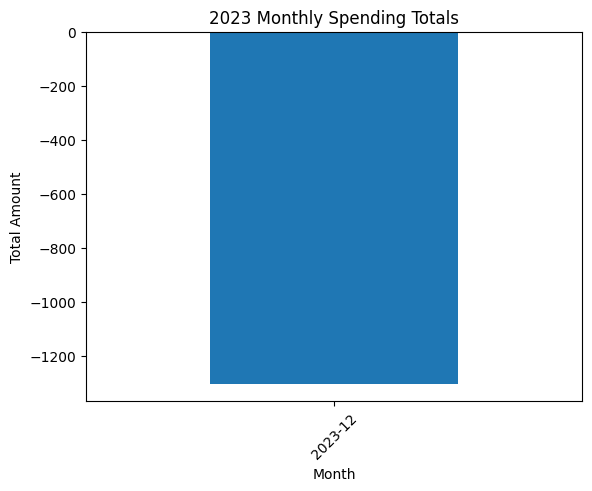

In [44]:
# Filter data for the year 2023
master_2023 = chase_analysis[chase_analysis['Date'].dt.year == 2023]

# Group by month and sum the 'Amount'
monthly_totals = master_2023.groupby(master_2023['Date'].dt.to_period('M')).agg({'Amount': 'sum'})

# Plotting
plt.figure(figsize=(10, 6))
monthly_totals.plot(kind='bar', legend=None)
plt.title('2023 Monthly Spending Totals')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x800 with 0 Axes>

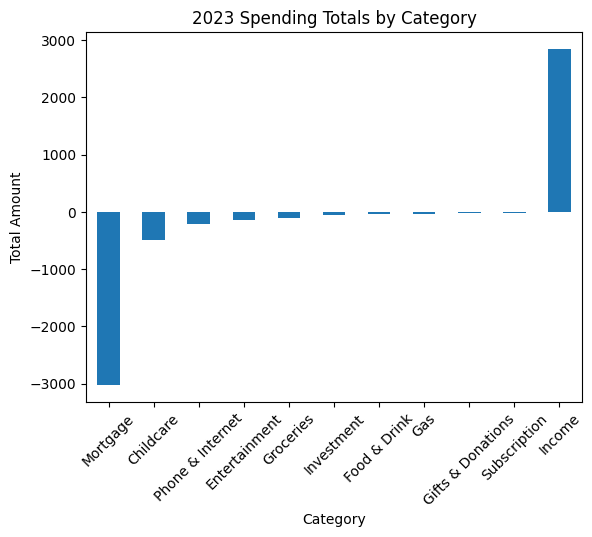

In [48]:
# Group by 'Category' and sum the 'Amount'
category_totals = master_2023.groupby('Category').agg({'Amount': 'sum'})

# Sort categories from highest to lowest
category_totals = category_totals.sort_values(by='Amount', ascending=True)

# Plotting
plt.figure(figsize=(12, 8))
category_totals.plot(kind='bar', legend=None)
plt.title('2023 Spending Totals by Category')
plt.xlabel('Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x800 with 0 Axes>

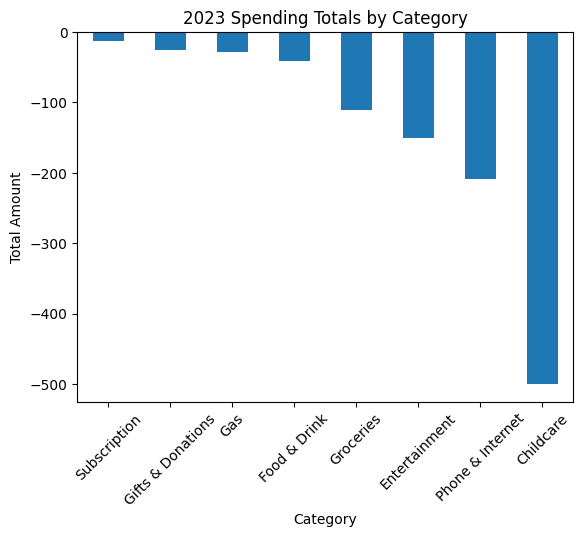

In [49]:
# Exclude specific categories
exclude_categories = ['Income', 'Mortgage', 'Investment']
filtered_category_totals = master_2023[~master_2023['Category'].isin(exclude_categories)]

# Group by 'Category' and sum the 'Amount'
category_totals = filtered_category_totals.groupby('Category').agg({'Amount': 'sum'})

# Sort categories from highest to lowest
category_totals = category_totals.sort_values(by='Amount', ascending=False)

# Plotting with wider size
plt.figure(figsize=(12, 8))
category_totals.plot(kind='bar', legend=None)
plt.title('2023 Spending Totals by Category')
plt.xlabel('Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()